# Projeto 1 - Ciência dos dados

### Por: Felipe Centurion Bellini - Engenharia 2A


O HIV, marcou algumas gerações, principalmente quem viveu entre as décadas de 60 a 80, hoje, já com um menor número de infectados e mortes essa doença ainda acaba afetando ainda um elevado número de pessoas. Muito se ouve de acordo com o censo comum que o HIV assombra países que possuem um menor IDH e uma baixa porcentagem de saneamento básico, mas isso é o censo comum, não? Para isso temos a nossa pergunta abaixo.


"É fácil relacionar como o IDH é influenciado com o mínimo de saneamento básico e de acordo com o censo comum, quanto mais precário são esses dois as chances de haver mortes por HIV tendem a serem maiores, mas o quanto isso realmente é verdade?"

Nesse projeto, portanto usaremos como fatores de comparação o IDH, o saneamento básico e o número de mortes por HIV, sendo na primeira avaliação usado o ano 2000"



In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
idh = pd.read_excel('hdi_human_development_index.xlsx')
saneamento = pd.read_excel('at_least_basic_sanitation_overall_access_percent.xlsx')
hiv = pd.read_excel('annual_hiv_deaths_number_all_ages.xlsx')


Mantendo apenas um determinado ano (2010):

In [16]:
idh_2000 = idh.loc[:, ["IDH", 2000]]
saneamento_2000 = saneamento.loc[:, ["Saneamento Básico", 2000]]
hiv_2000 = hiv.loc[:, ["HIV", 2000]]

Mudando os índices:

In [17]:
idh_idx = idh_2000.set_index('IDH')
saneamento_idx = saneamento_2000.set_index('Saneamento Básico')
hiv_idx = hiv_2000.set_index('HIV')

Renomeando as colunas das duas primeiras tabelas e juntando as mesmas:

In [18]:
df = idh_idx.join(saneamento_idx, how='inner', lsuffix='_IDH', rsuffix='_Saneamento Básico')
df.head(10)

,2000_IDH,2000_Saneamento Básico
Afghanistan,0.340,23.9
Albania,0.662,88.3
Algeria,0.644,83.7
Andorra,NaN,100.0
Angola,0.391,20.5
Antigua and Barbuda,NaN,82.4
Argentina,0.771,94.8
Armenia,0.644,90.4
Australia,0.899,100.0
Austria,0.837,100.0


Renomeando e juntando a terceira tabela às demais:

In [19]:
hiv_idx["2000_HIV"] = hiv_idx.pop(2000)
dados = df.join(hiv_idx, how='inner')
dados = dados.dropna()
dados.head(10)

,2000_IDH,2000_Saneamento Básico,2000_HIV
Afghanistan,0.340,23.9,150.0
Algeria,0.644,83.7,120.0
Angola,0.391,20.5,9200.0
Argentina,0.771,94.8,2700.0
Armenia,0.644,90.4,150.0
Australia,0.899,100.0,150.0
Austria,0.837,100.0,60.0
Azerbaijan,0.642,65.6,150.0
Bahamas,0.779,88.6,600.0
Bangladesh,0.468,25.3,60.0


Agora, salvando um arquivo com a tabela já editada:

In [20]:
tabela = dados.to_csv()

with open('arquivo.csv', 'w') as aloo:
    aloo.write(tabela)

Separando agora o arquivo com somente os países com alto IDH (esses mesmos portanto apresentam também uma alta porcentagem de saneamento básico) e analisando o gráfico de dispersão em relação ao HIV no ano 2000:

In [21]:
dados_idh_alto = (dados[(dados['2000_IDH']>=0.800)])
dados_idh_alto

,2000_IDH,2000_Saneamento Básico,2000_HIV
Australia,0.899,100.0,150.0
Austria,0.837,100.0,60.0
Belgium,0.873,99.5,60.0
Canada,0.867,98.5,350.0
Czech Republic,0.821,99.1,60.0
Denmark,0.862,99.6,60.0
Finland,0.856,99.4,60.0
France,0.849,98.7,1800.0
Germany,0.860,99.2,600.0
Greece,0.801,96.6,150.0


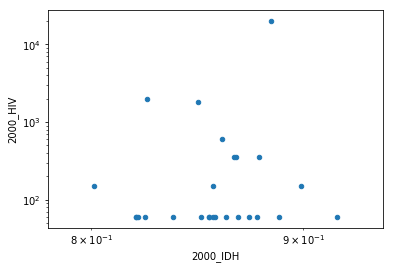

In [22]:
dados_idh_alto.plot.scatter(x='2000_IDH',y='2000_HIV', loglog=True);

Agora analisando o gráfico de dispersão de HIV no ano 2000 por IDH de todos os países na tabela:

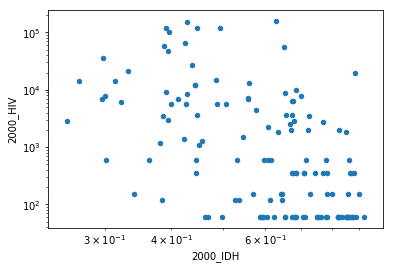

In [23]:
dados.plot.scatter(x='2000_IDH',y='2000_HIV', loglog=True);

Para melhor analisarmos como se comporta os nossos dados será plotado um gráfico de matriz:

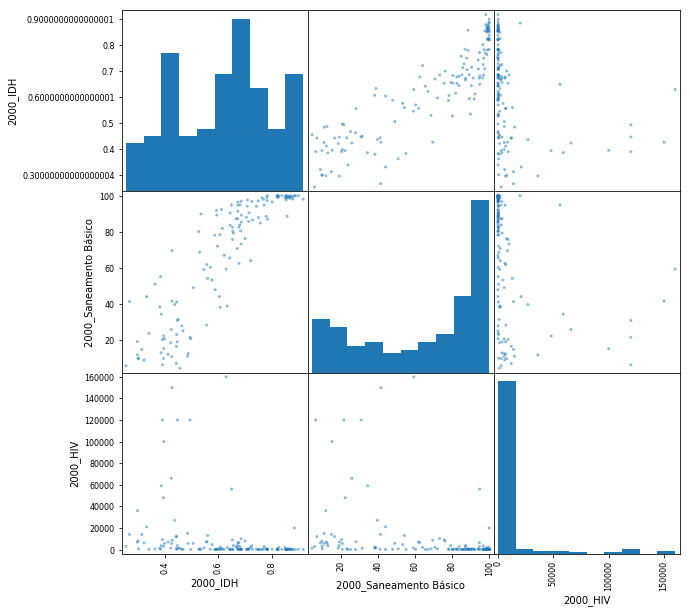

In [24]:
pd.plotting.scatter_matrix(dados, figsize=(10, 10));

In [25]:
dados.corr()

,2000_IDH,2000_Saneamento Básico,2000_HIV
2000_IDH,1.000000,0.887163,-0.293593
2000_Saneamento Básico,0.887163,1.000000,-0.324019
2000_HIV,-0.293593,-0.324019,1.000000


## Conclusão

Conforme observado nos gráficos plotados no decorrer do projeto observamos uma relação entre os três dados analisados. Respondendo portanto a nossa pergunta através dos gráficos, que o censo comum não apresenta informações baseadas em muitos fundamentos. Mas com os gráficos vemos uma associação positiva, no entanto quando visto os valores de correlação do HIV no ano 2000 com os dados de IDH e de saneamento básico os valores apresentam negativos, não colaborando para a sustentação da hipótese.

Com isso concluímos que infelizmente os dados esperados se mostraram presentes nos gráficos mas não na tabela.

Com estas observações, nos questionamos que podemos concluir de acordo com as tabelas que há países com alto índice de IDH e de saneamento básico e com um alto número de mortes por HIV. Mas como a tabela de correlação prova ao contrário fica a dúvida de como podemos por intuição, por análise de dados e por informações históricas concluirmos que havia um correlação, então fica o questionamento de como poderíamos investigarmos isso melhor.